In [12]:
import cv2
import numpy as np
from skimage import io, filters, exposure, color, restoration
import matplotlib.pyplot as plt

In [13]:
# Load the images
microscope_image_path = 'Lab7-1.png' 
candy_image_path = 'Lab7-2.png'  
satellite_image_path = 'Lab7-3.png' 

In [14]:
microscope_image = cv2.imread(microscope_image_path, cv2.IMREAD_GRAYSCALE)
candy_image = cv2.imread(candy_image_path, cv2.IMREAD_GRAYSCALE)
satellite_image = cv2.imread(satellite_image_path, cv2.IMREAD_GRAYSCALE)

# cv2.imshow("Lab7-2.png",candy_image,)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [15]:
def detect_blobs(image):
    log_blur = cv2.GaussianBlur(image, (5, 5), 0)
    log = cv2.Laplacian(log_blur, cv2.CV_64F)
    
    dog_blur1 = cv2.GaussianBlur(image, (5, 5), 1)
    dog_blur2 = cv2.GaussianBlur(image, (5, 5), 2)
    dog = dog_blur1 - dog_blur2
    
    hog = filters.sobel(image)
    
    return log, dog, hog

log, dog, hog = detect_blobs(microscope_image)

In [16]:

log, dog, hog = detect_blobs(microscope_image)

In [17]:
def enhance_image(image):
    alpha = 1.5  # Contrast control
    beta = 20    # Brightness control
    bright_contrast = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    
    kernel_sharp = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    sharpened = cv2.filter2D(image, -1, kernel_sharp)
    
    denoised = cv2.fastNlMeansDenoising(image, h=10)
    
    equalized = cv2.equalizeHist(image)
    
    return bright_contrast, sharpened, denoised, equalized

In [18]:
bright_contrast, sharpened, denoised, equalized = enhance_image(microscope_image)

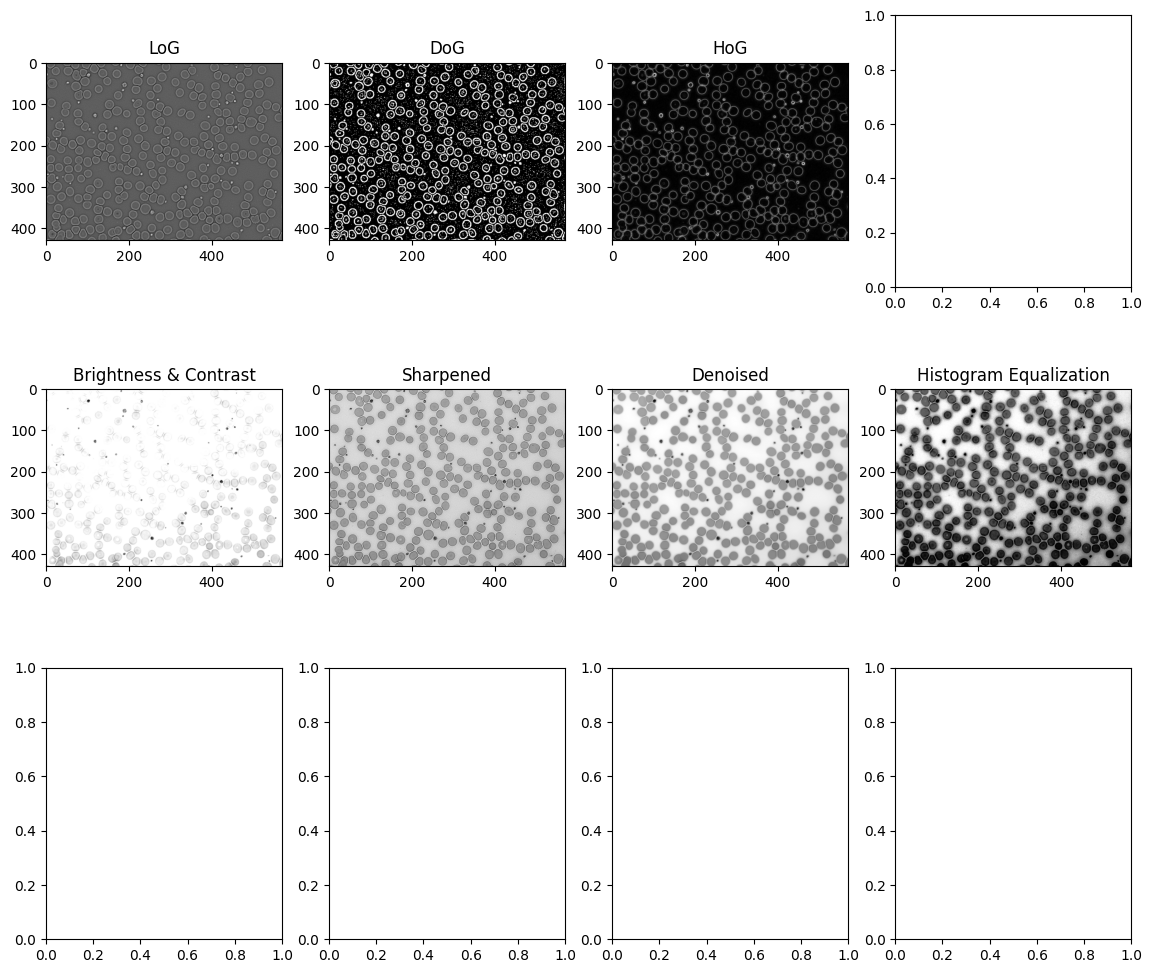

In [19]:
fig, axes = plt.subplots(3, 4, figsize=(14, 12))
axes[0, 0].imshow(log, cmap='gray'); axes[0, 0].set_title("LoG")
axes[0, 1].imshow(dog, cmap='gray'); axes[0, 1].set_title("DoG")
axes[0, 2].imshow(hog, cmap='gray'); axes[0, 2].set_title("HoG")
axes[1, 0].imshow(bright_contrast, cmap='gray'); axes[1, 0].set_title("Brightness & Contrast")
axes[1, 1].imshow(sharpened, cmap='gray'); axes[1, 1].set_title("Sharpened")
axes[1, 2].imshow(denoised, cmap='gray'); axes[1, 2].set_title("Denoised")
axes[1, 3].imshow(equalized, cmap='gray'); axes[1, 3].set_title("Histogram Equalization")
plt.show()

In [20]:
def preprocess_image(image):
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    kernel = np.ones((3, 3), np.uint8)
    morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
    return morph

In [21]:
def detect_candies(image):
    params = cv2.SimpleBlobDetector_Params()
    params.filterByArea = True
    params.minArea = 100  # Minimum candy size
    params.maxArea = 5000 # Maximum candy size
    params.filterByCircularity = False
    params.filterByConvexity = False
    params.filterByInertia = False

    detector = cv2.SimpleBlobDetector_create(params)
    keypoints = detector.detect(image)
    return keypoints

In [22]:
if candy_image is not None:
    preprocessed_image = preprocess_image(candy_image)
    keypoints = detect_candies(preprocessed_image)
    num_candies = len(keypoints)
    print(f"Number of candies detected: {num_candies}")
    
    # Draw detected candies
    candy_image_with_blobs = cv2.cvtColor(candy_image, cv2.COLOR_GRAY2BGR)
    candy_image_with_blobs = cv2.drawKeypoints(candy_image, keypoints, np.array([]),
                                               (0, 255, 0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
    cv2.imshow("Candy Detection", candy_image_with_blobs)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

Number of candies detected: 20


2025-04-07 09:48:02.907 Python[53433:10243482] +[IMKClient subclass]: chose IMKClient_Modern
2025-04-07 09:48:02.907 Python[53433:10243482] +[IMKInputSession subclass]: chose IMKInputSession_Modern
